In [ ]:
!pip install tensorflow==2.0.0-alpha0

In [ ]:
!pip install kaggle

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:24<00:00, 90.3MB/s]
100% 2.29G/2.29G [00:24<00:00, 99.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
train_folder= '/content/files/chest_xray/chest_xray/train/'
val_folder = '/content/files/chest_xray/chest_xray/val/'
test_folder = '/content/files/chest_xray/chest_xray/test/'

In [ ]:
os.listdir(train_folder)
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

Text(0.5, 1.0, 'Pneumonia')

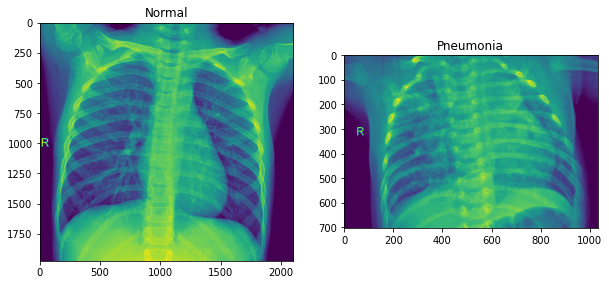

In [ ]:
rand_norm = np.random.randint(0,len(os.listdir(train_n)))
rand_pneu = np.random.randint(0,len(os.listdir(train_p)))

norm_img = os.listdir(train_n)[rand_norm]
norm_img_address = train_n + norm_img

pneu_img = os.listdir(train_p)[rand_pneu]
pneu_img_address = train_p + pneu_img

norm_load = Image.open(norm_img_address)
pneu_load = Image.open(pneu_img_address)


f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneu_load)
a2.set_title('Pneumonia')

In [ ]:
for i in range(len(train_images)):
  train_images[i] = preprocess_image(train_images[i])

In [ ]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_labels.shape, train_images.shape)

(25000,) (25000, 96, 96, 1)


In [ ]:
num_of_test_samples = 600
batch_size = 32
layers = [
          tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=(64, 64, 3)),
          tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
          tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
          tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
          tf.keras.layers.Dense(units=1, activation=tf.nn.softmax), 
         ]

model = tf.keras.Sequential(layers)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_data.flow_from_directory('/content/files/chest_xray/chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = test_data.flow_from_directory('/content/files/chest_xray/chest_xray/val/',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_data.flow_from_directory('/content/files/chest_xray/chest_xray/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
cnn_model = model.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_set,
                         validation_steps = 624)

163/163 [==============================] - 178s 1s/step - loss: 3.9421 - accuracy: 0.7429 - val_loss: 7.6666 - val_accuracy: 0.5000


In [ ]:
test_accu = model.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 62.55135536193848 %


In [ ]:
#Accuracy with 4 Deep layers
#test_accu = model.evaluate_generator(test_set,steps=624)
#print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 50.0 %
